In [38]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance
from ta import add_all_ta_features
from sklearn.model_selection import GridSearchCV
from playsound import playsound
from sklearn.decomposition import PCA

%matplotlib inline

In [39]:
df = pd.read_csv('data.csv')

In [40]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [41]:
df

,TARGET,yearly,weekly,ma20above50,ma50above100,ma20above100,ma5,ma20,ma50,ma100,ema5,ema10,ema20,ema50,ema100
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3054,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3055,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3056,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0


In [42]:
data = df.copy()
#data_d.drop("TARGET",axis=1,inplace=True)

In [43]:
#seperating independent and dependent variables
y = data['TARGET']
X = data.drop(['TARGET'], axis=1)

In [44]:
y.dropna(inplace=True)

In [45]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [46]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [47]:
X_train.shape,X_valid.shape,y_valid.shape

((2293, 14), (765, 14), (765,))

In [48]:
# distribution in training set
y_train.value_counts(normalize=True)

TARGET
0    0.512865
1    0.487135
Name: proportion, dtype: float64

In [49]:
# distribution in validation set
y_valid.value_counts(normalize=True)

TARGET
0    0.512418
1    0.487582
Name: proportion, dtype: float64

In [50]:
#shape of training set
X_train.shape, y_train.shape

((2293, 14), (2293,))

In [51]:
#shape of validation set
X_valid.shape, y_valid.shape

((765, 14), (765,))

In [52]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [53]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [54]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [55]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [56]:
#checking the training score
dt_model.score(X_train, y_train)

0.5656345399040559

In [57]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.4823529411764706

In [58]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [94]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [32]:
from sklearn.metrics import accuracy_score

In [59]:
def getParamsWithDim(datas):
    data = []
    for n in datas:
        data.append(round(X_train.shape[0]/n))
    return data

#analysis(dt_model,X_train,y_train,range(1,10),"min_samples_leaf")
#min_samples_leaf,max_depth
    
def analysis(dt_model,X_train,y_train,params,typeOfParams):
    train_accuracy = []
    validation_accuracy = []
    for depth in params:
        if typeOfParams == "max_depth":
            dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
        elif typeOfParams == "min_samples_leaf":
            dt_model = DecisionTreeClassifier(min_samples_leaf=depth, random_state=10)
        elif typeOfParams == "max_leaf_nodes":
            dt_model = DecisionTreeClassifier(max_leaf_nodes=depth, random_state=10)
        elif typeOfParams == "ccp_alpha":
            dt_model = DecisionTreeClassifier(ccp_alpha=depth, random_state=10)
        elif typeOfParams == "criterion":
            dt_model = DecisionTreeClassifier(criterion=depth, random_state=10)
        elif typeOfParams == "min_samples_split":
            dt_model = DecisionTreeClassifier(min_samples_split=depth, random_state=10)
        elif typeOfParams == "splitter":
            dt_model = DecisionTreeClassifier(splitter=depth, random_state=10)
        elif typeOfParams == "max_features":
            dt_model = DecisionTreeClassifier(max_features=depth, random_state=10)
        elif typeOfParams == "min_weight_fraction_leaf":
            dt_model = DecisionTreeClassifier(min_weight_fraction_leaf=depth, random_state=10)
        elif typeOfParams == "min_impurity_decrease":
            dt_model = DecisionTreeClassifier(min_impurity_decrease=depth, random_state=10)

        dt_model.fit(X_train, y_train)
        train_accuracy.append(dt_model.score(X_train, y_train))
        validation_accuracy.append(dt_model.score(X_valid, y_valid))
    
    frame = pd.DataFrame({'{}'.format(typeOfParams):params, 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

    plt.figure(figsize=(12,6))
    plt.plot(frame[typeOfParams], frame['train_acc'], marker='o')
    plt.plot(frame[typeOfParams], frame['valid_acc'], marker='o')
    plt.xlabel('Depth of tree')
    plt.ylabel('performance')
    plt.legend()
    
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


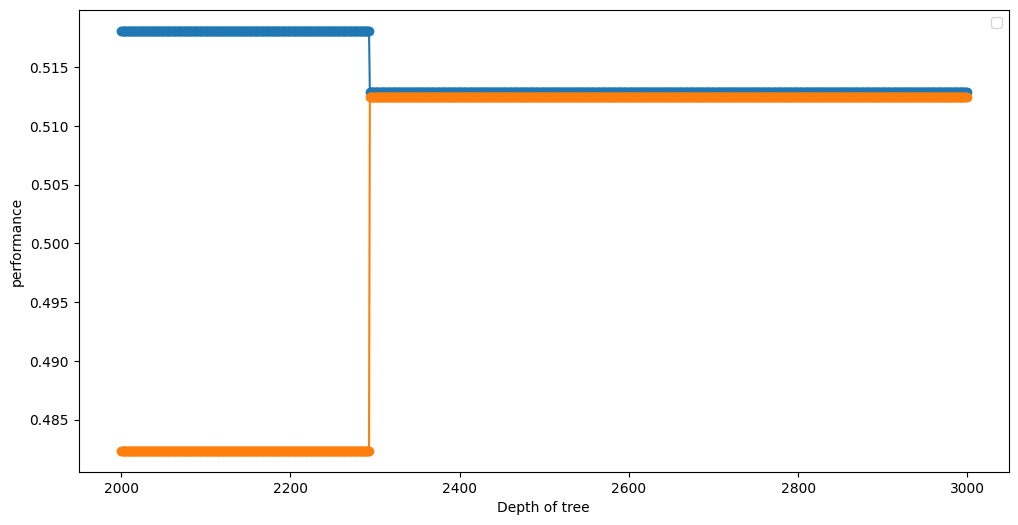

In [60]:

#path = dt_model.cost_complexity_pruning_path(X_train, y_train)
#ccp_alphas, impurities = path.ccp_alphas, path.impurities
#analysis(dt_model,X_train,y_train,ccp_alphas,"ccp_alpha")

#max_depth,min_samples_leaf#max_leaf_nodes
#analysis(dt_model,X_train,y_train,range(1,10),"max_depth")
#analysis(dt_model,X_train,y_train,range(1,10),"max_features")
#analysis(dt_model,X_train,y_train,np.arange(0.01, .2, 0.01),"min_weight_fraction_leaf")
#analysis(dt_model,X_train,y_train,np.arange(0.000, 0.002, 0.0001),"min_impurity_decrease")


#analysis(dt_model,X_train,y_train,range(5,100),"max_leaf_nodes")
#analysis(dt_model,X_train,y_train,["gini","entropy"],"criterion")
#analysis(dt_model,X_train,y_train,["best","random"],"splitter")


#analysis(dt_model,X_train,y_train,getParamsWithDim(range(40,60)),"max_leaf_nodes")
#analysis(dt_model,X_train,y_train,getParamsWithDim(range(30,50)),"min_samples_leaf")
analysis(dt_model,X_train,y_train,(range(2000,3000)),"min_samples_split")




## Changing the max_depth

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [61]:
dt_model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=340, max_leaf_nodes=54, random_state=10,
                                 ccp_alpha=0.00007,
                                 min_samples_split=115,
                                 min_weight_fraction_leaf=0.030,
                                # min_impurity_decrease=0.00040
                                 )

In [ ]:
from time import time
start = time()

gb = DecisionTreeClassifier()
print(np.arange(1,10,1))
parameters = {
    'max_depth': np.arange(1,10,1),
    #'max_features': np.arange(1,10,1),
    'max_leaf_nodes':getParamsWithDim(np.arange(20,115,4)),
    'min_samples_split': np.arange(1,10,1),
    'min_weight_fraction_leaf': np.arange(0.01, 0.15, 0.01),
   # "min_impurity_decrease" : np.arange(0.000, 0.002, 0.0001)
}
cv = GridSearchCV(gb, parameters, cv=5,verbose=1,n_jobs=-1)
cv.fit(X_train, y_train)

print_results(cv)
end = time()
time = round((end - start)*1000, 1)
print(time)
#parameters
playsound("file:///Users/vipin/workspace/ai/my_own/alert.mp3")  


[1 2 3 4 5 6 7 8 9]
Fitting 5 folds for each of 27216 candidates, totalling 136080 fits


/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15120 fits failed out of a total of 136080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/sklearn/base.py", line 637, i

BEST PARAMS: {'max_depth': 4, 'max_leaf_nodes': 115, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.060000000000000005}

nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.01}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.02}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.03}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.04}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.05}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.060000000000000005}
nan (+/-nan) for {'max_depth': 1, 'max_leaf_nodes': 115, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.06999999999999999}
nan (+/-nan) for {'max_depth': 1, 'm

nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.06999999999999999}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.08}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.09}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.09999999999999999}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.11}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.12}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.13}
nan (+/-nan) for {'max_depth': 4, 'max_leaf_nodes': 34, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.14}
0.511 (+/-0.023) for {'max_depth': 4, 'max_leaf_nodes': 34

nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.060000000000000005}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.06999999999999999}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.08}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.09}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.09999999999999999}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.11}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.12}
nan (+/-nan) for {'max_depth': 5, 'max_leaf_nodes': 22, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.13}
nan (+/-nan) for {'max_depth': 5, 'max_lea

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=7e-05, max_depth=7, max_leaf_nodes=54,
                       min_samples_leaf=340, min_samples_split=115,
                       min_weight_fraction_leaf=0.03, random_state=10)

In [61]:
dir(cv)
#cv.best_params_
dt_model = cv.best_estimator_

In [62]:
#Training score
dt_model.score(X_train, y_train)

0.5372727272727272

In [63]:
#Validation score
dt_model.score(X_valid, y_valid)

0.5272479564032697

In [34]:
from sklearn import tree

In [35]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=20,filled=True)

In [36]:
!dot -Tpng tree.dot -o tree.png

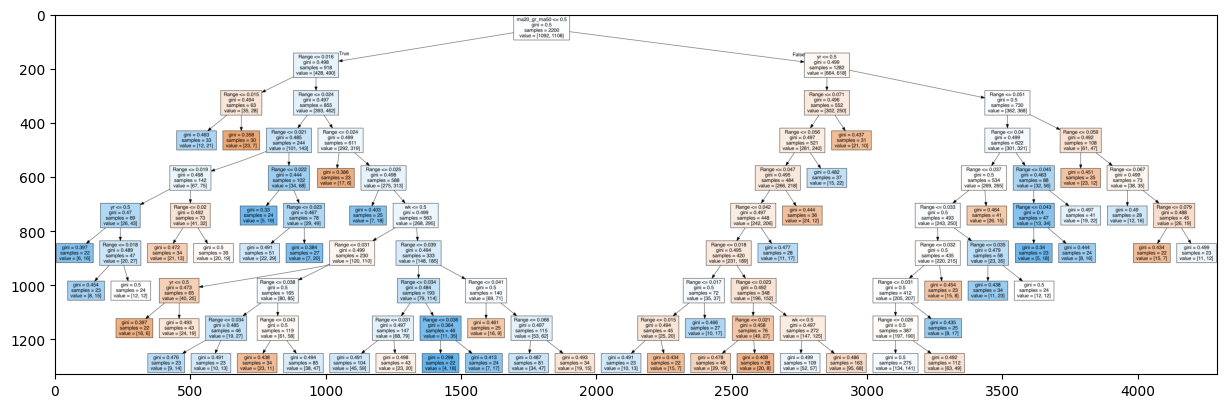

In [37]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)